In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import squarify

In [2]:
data=pd.read_csv('C:/Users/Acer Pc/Desktop/Final/Final DataSet/New folder/InsuranceClaim_data.csv')
                 

In [3]:
data.head()

,Customer_ID,Claim_Invoice_No,Date,Age,Disease,Gender,BMI,Children,Smoker,Region,Charges
0,4.892870e+10,1.640020e+11,4/17/2019,33,Urology,Male,33.4,3,1,2,38282.74950
1,4.892870e+10,1.640090e+11,7/4/2019,33,Urology,Male,33.4,3,1,2,36898.73308
2,4.892870e+10,1.650080e+11,6/7/2020,33,Urology,Male,33.4,3,1,2,48824.45000
3,4.892870e+10,1.650090e+11,7/26/2020,33,Urology,Male,33.4,3,1,2,38415.47400
4,4.892870e+10,1.643320e+11,1/5/2020,33,Urology,Male,33.4,3,1,2,37465.34375


In [4]:
data.tail()

,Customer_ID,Claim_Invoice_No,Date,Age,Disease,Gender,BMI,Children,Smoker,Region,Charges
995,141199.0,3690637.0,10/21/2019,27,Urology,Male,33.33,4,1,2,37370.10
996,141199.0,3799137.0,4/20/2019,27,Urology,Male,33.33,4,1,2,36080.28
997,777906.0,108218.0,7/28/2020,62,Intestinal infectious diseases,Male,37.67,3,1,1,28468.00
998,777906.0,108218.0,6/3/2020,62,Intestinal infectious diseases,Male,37.67,3,1,1,27926.50
999,777906.0,108218.0,1/31/2020,62,Intestinal infectious diseases,Male,37.67,3,1,1,46710.20


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       1000 non-null   float64
 1   Claim_Invoice_No  1000 non-null   float64
 2   Date              1000 non-null   object 
 3   Age               1000 non-null   int64  
 4   Disease           1000 non-null   object 
 5   Gender            1000 non-null   object 
 6   BMI               1000 non-null   float64
 7   Children          1000 non-null   int64  
 8   Smoker            1000 non-null   int64  
 9   Region            1000 non-null   int64  
 10  Charges           1000 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 86.1+ KB


In [6]:
data= data[pd.notnull(data['Customer_ID'])]

In [7]:
filtered_data=data[['Gender','Customer_ID']].drop_duplicates()

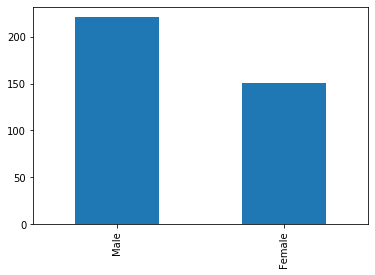

In [8]:
#data.groupby('Gender').count()["record_id"].plot(kind='bar')
filtered_data.Gender.value_counts().plot(kind='bar')

In [9]:
#select MaleData
Female_data=data[data.Gender=='Female']


In [10]:
Female_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 5 to 992
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       320 non-null    float64
 1   Claim_Invoice_No  320 non-null    float64
 2   Date              320 non-null    object 
 3   Age               320 non-null    int64  
 4   Disease           320 non-null    object 
 5   Gender            320 non-null    object 
 6   BMI               320 non-null    float64
 7   Children          320 non-null    int64  
 8   Smoker            320 non-null    int64  
 9   Region            320 non-null    int64  
 10  Charges           320 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 30.0+ KB


In [11]:
Female_data.describe()

,Customer_ID,Claim_Invoice_No,Age,BMI,Children,Smoker,Region,Charges
count,3.200000e+02,3.200000e+02,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,5.082254e+12,1.995585e+11,41.056250,31.888547,1.403125,0.512500,1.715625,24605.465224
std,1.787701e+13,4.891963e+11,13.231835,5.889394,1.191660,0.500627,0.918500,12880.769466
min,4.024000e+03,3.944300e+04,18.000000,22.420000,0.000000,0.000000,0.000000,2026.974100
25%,2.940208e+06,4.265292e+06,28.000000,27.000000,0.000000,0.000000,1.000000,13303.846950
50%,3.666906e+07,1.628678e+08,47.000000,31.825000,2.000000,1.000000,2.000000,24535.698550
75%,2.285674e+10,1.623030e+11,52.000000,35.100000,2.000000,1.000000,2.000000,27346.042070
max,9.920000e+13,1.697030e+12,62.000000,52.800000,5.000000,1.000000,3.000000,49024.500000


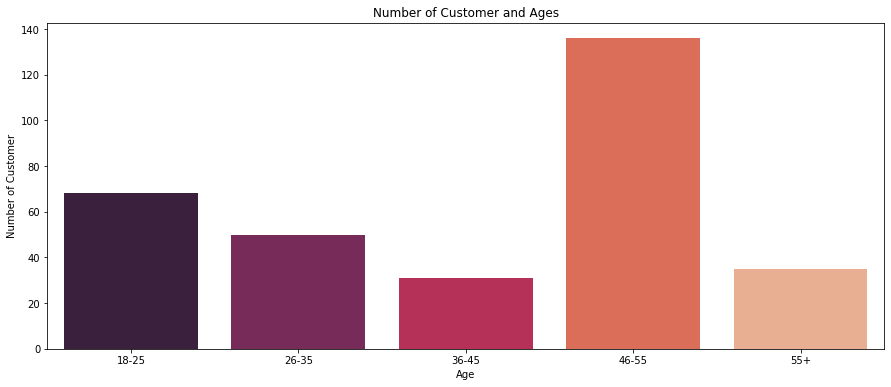

In [12]:
age18_25 = Female_data.Age[(Female_data.Age <= 25) & (Female_data.Age >= 18)]
age26_35 = Female_data.Age[(Female_data.Age <= 35) & (Female_data.Age >= 26)]
age36_45 = Female_data.Age[(Female_data.Age <= 45) & (Female_data.Age >= 36)]
age46_55 = Female_data.Age[(Female_data.Age <= 55) & (Female_data.Age >= 46)]
age55above = Female_data.Age[Female_data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [13]:
#select Age Group
#Age_data=Male_data[Male_data.Age=='age36_45']
#Disease_data=data[data.Disease=='Diseases of the digestive system']
#age36_45 = Male_data.Age[(Male_data.Age <= 45) & (Male_data.Age >= 36)]
#Age_data = Male_data.len(age36_45.values)
 #Age_data =Male_data.Age[(Male_data.Age <= 45) & (Male_data.Age >= 36)]
Age_data = Female_data[(Female_data.Age <= 55) & (Female_data.Age >= 46)]

In [14]:
Age_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 27 to 992
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       136 non-null    float64
 1   Claim_Invoice_No  136 non-null    float64
 2   Date              136 non-null    object 
 3   Age               136 non-null    int64  
 4   Disease           136 non-null    object 
 5   Gender            136 non-null    object 
 6   BMI               136 non-null    float64
 7   Children          136 non-null    int64  
 8   Smoker            136 non-null    int64  
 9   Region            136 non-null    int64  
 10  Charges           136 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 12.8+ KB


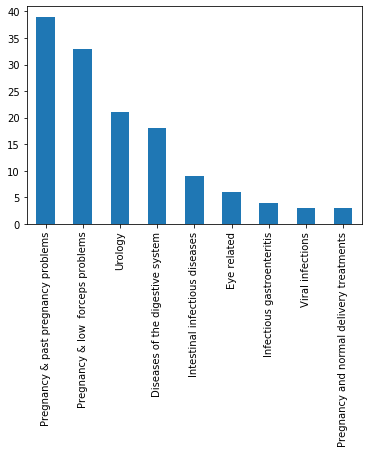

In [15]:
#data.groupby('Disease').count()["record_id"].plot(kind='bar')
#Age_data.Age.value_counts().plot(kind='bar')
Age_data.Disease.value_counts().plot(kind='bar')

In [16]:
#select Diseases of the digestive system
d_data=Age_data[Age_data.Disease=='Pregnancy & past pregnancy problems']

Text(0.5, 0, 'Number of claims')

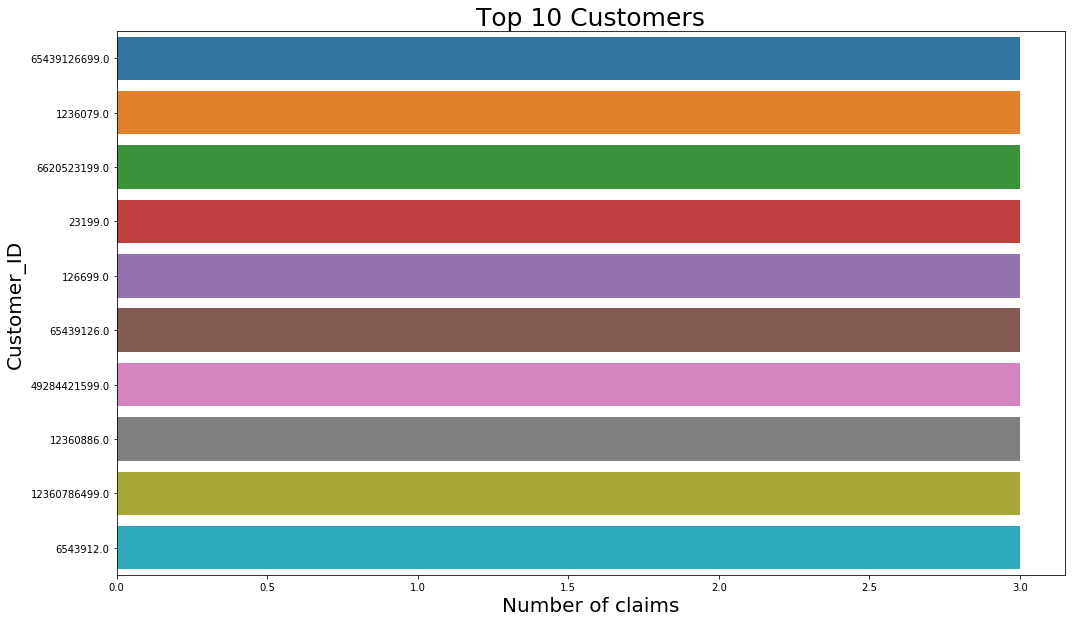

In [17]:
plt.figure(figsize=(17,10))
sns.countplot(y = d_data.Customer_ID, \
              order = d_data.Customer_ID.value_counts().iloc[:10].index, \
                                                      orient = 'v')
plt.title('Top 10 Customers', fontsize = 25)
plt.ylabel('Customer_ID', fontsize = 20)
plt.xlabel('Number of claims', fontsize = 20)

(0.0, 100.0, 0.0, 100.0)

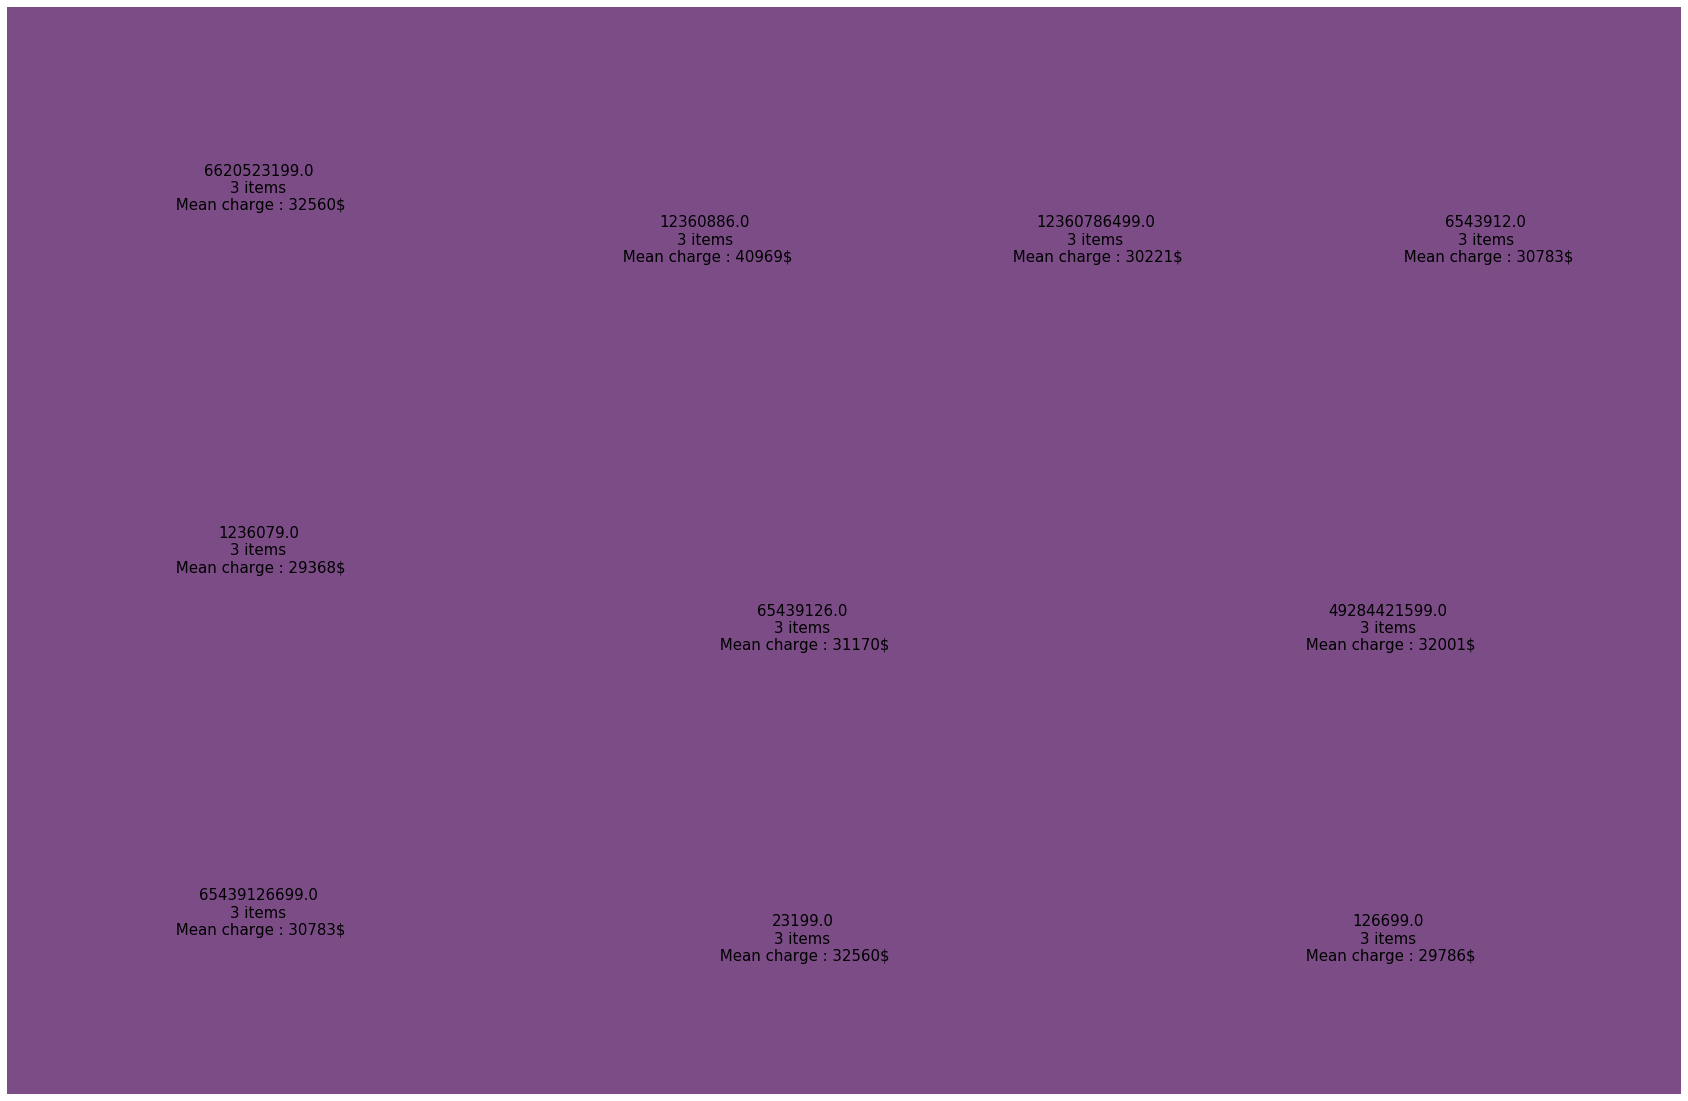

In [18]:
# Size of each category
cats = pd.DataFrame(d_data.Customer_ID.value_counts())
cats.reset_index(level = 0, inplace=True)
cats = cats.sort_values(by='Customer_ID', ascending = False).head(10)
cats.columns =('Customer_ID', 'size')

# Price by category
group = d_data.groupby(d_data.Customer_ID)
mean_charge = group.Charges.mean()
mean_charge = pd.DataFrame(mean_charge)
mean_charge.reset_index(level = 0, inplace=True)

# Merging
cats = pd.merge(cats, mean_charge, how='left', on = 'Customer_ID')

# Colors setting
cmap = matplotlib.cm.viridis
mini=min(cats['size'])
maxi=max(cats['size'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in cats['size']]



# Labels setting
labels = ["%s\n%d items\n Mean charge : %d$" % (label) \
          for label in zip(cats['Customer_ID'], cats['size'], cats['Charges'])]

# Plotting
plt.figure(figsize=(30,20))
plt.rc('font', size=15)
squarify.plot(sizes = cats['size'], label = labels, alpha = .7, color=colors)
plt.axis('off')